In [36]:
import pandas as pd
import numpy as np

In [37]:
df = pd.read_csv(r'placement.csv')

In [38]:
df.sample(5)

,cgpa,placement_exam_marks,placed
319,7.53,13.0,0
196,7.28,34.0,1
185,7.30,31.0,0
981,8.06,37.0,0
793,7.23,9.0,0


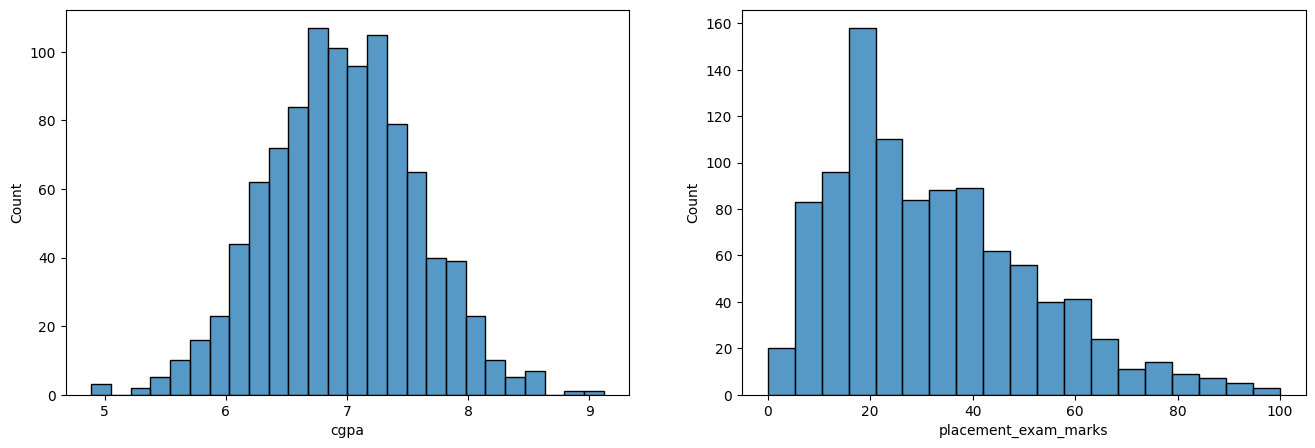

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'])

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'])

plt.show()


In [40]:
df['placement_exam_marks'].skew()

np.float64(0.8356419499466834)

In [41]:
df['cgpa'].skew()

np.float64(-0.014529938929314918)

In [42]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

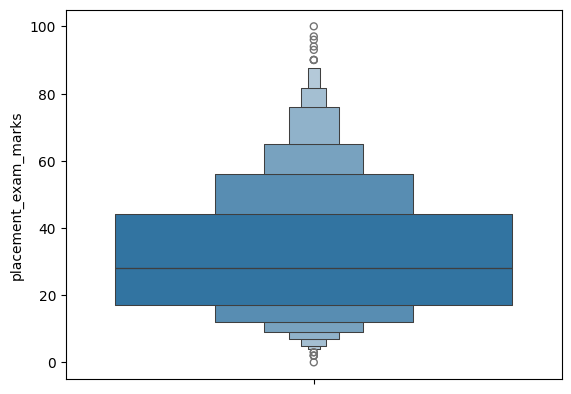

In [43]:
sns.boxenplot(df['placement_exam_marks'])  # sns.boxenplot(): This function plots a boxen plot, an extended version of the box plot, which shows more quantiles and provides a more detailed view of the data distribution. It is particularly useful for large datasets as it can highlight data concentration at different quantile levels.
plt.show()

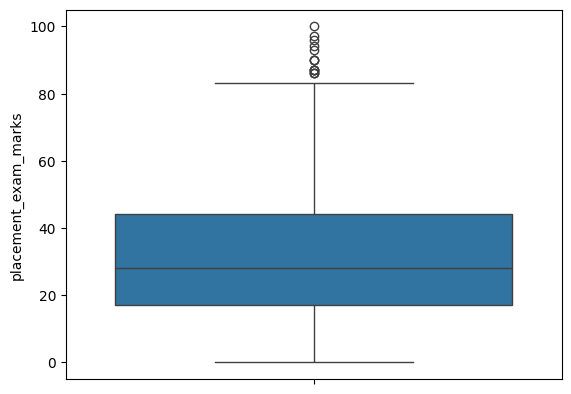

In [44]:
sns.boxplot(df['placement_exam_marks'])
plt.show()

In [45]:
# Finding the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [46]:
print(percentile25)
print(percentile75)

17.0
44.0


In [47]:
iqr = percentile75 - percentile25
iqr

np.float64(27.0)

In [48]:
upper_limit = percentile75 + 1.5 * iqr    # Q3 + 1.5(IQR)
lower_limit = percentile25 - 1.5 * iqr    # Q1 - 1.5(IQR)
print("Upper Limit is :", upper_limit)
print("Lower Limit is :" ,lower_limit)

Upper Limit is : 84.5
Lower Limit is : -23.5


In [49]:
# Finding Outliers

In [50]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [51]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


In [52]:
# Trimming

In [53]:
new_df = df[df['placement_exam_marks'] < upper_limit]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


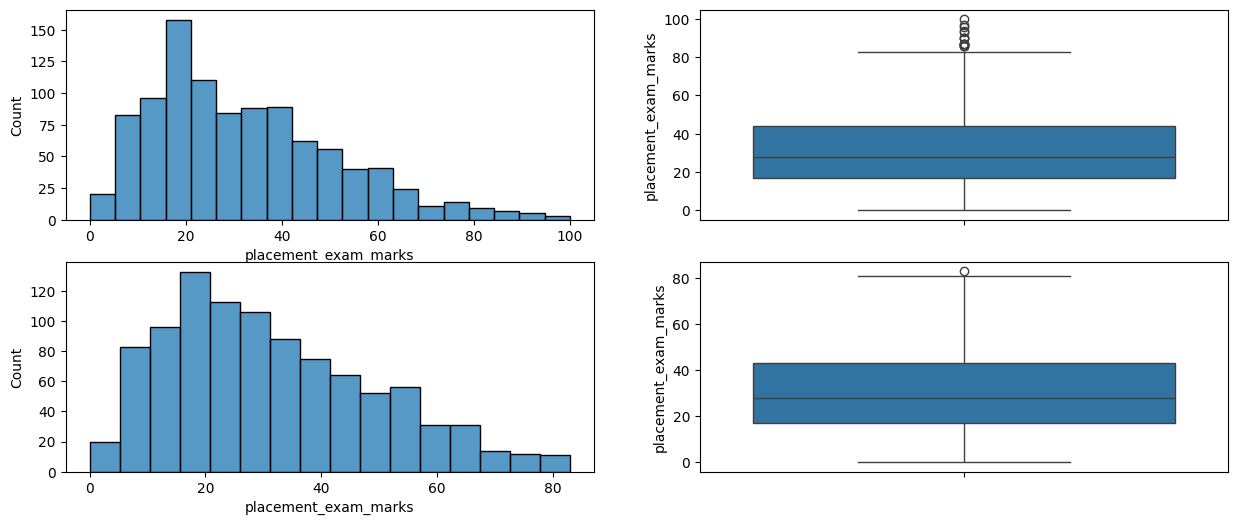

In [54]:
# Comparing old Vs New

plt.figure(figsize=(15,6))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.histplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()

In [55]:
# Capping

In [57]:
new_df_capping = df.copy()

new_df_capping['placement_exam_marks'] = np.where(
    new_df_capping['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_capping['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_capping['placement_exam_marks']
    )
)

In [58]:
new_df_capping.shape

(1000, 3)

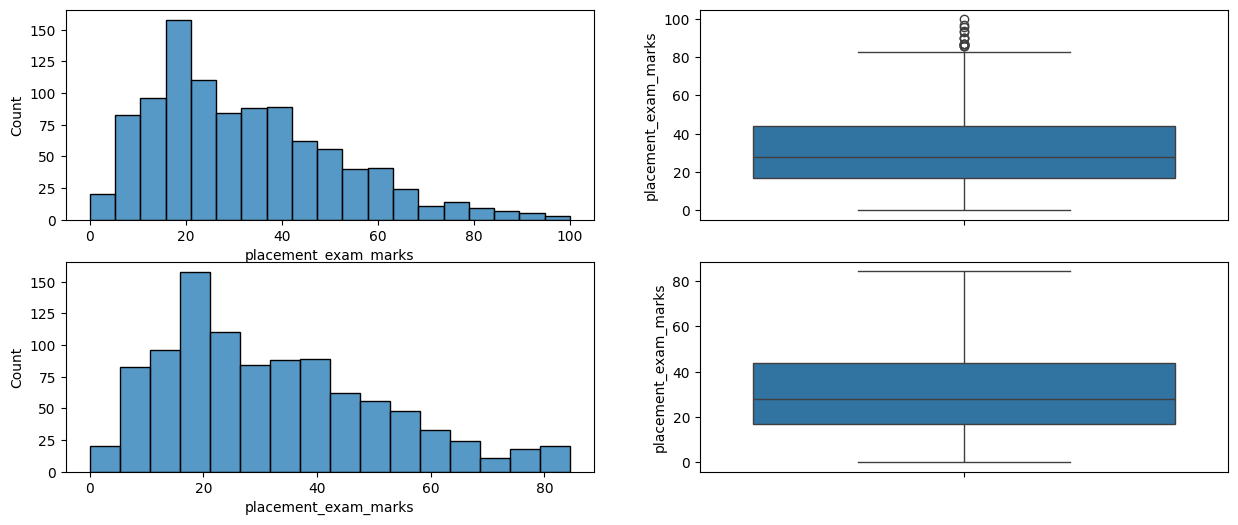

In [59]:
# Comparing old Vs new

plt.figure(figsize=(15,6))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.histplot(new_df_capping['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df_capping['placement_exam_marks'])

plt.show()